In [1]:
import pandas as pd
import numpy as np

#### О способах загрузки данных

##### Kaggle fan

In [ ]:
%pip install kaggle

Получаем файл "kaggle.json", который затем нужно открыть в скрипте ниже. Этот файл можно получить в параметрах аккаунта Kaggle.

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))


!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Команда для загрузки данных по титанику

In [ ]:
!kaggle competitions download -c titanic

##### Google Drive enjoyer

Понятное дело, для этого нужно загрузить csv-файлы на свой google-диск. После этого мы связываем нашу текущую сессию Colab'а с нашим диском, в котором мы уже можем найти эти загруженные данные.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Это команда для разархивации скачанного архива

In [ ]:
!unzip titanic.zip

%cd - это команда для перемещения в некоторую директорию. Используй её, чтобы переместиться туда, где находятся скачанные csv-файлы.

In [ ]:
%cd drive/MyDrive/Colab Notebooks

С помощью команды !ls можем посмотреть, какие файлы находятся в директории, в которой мы находимся.

In [ ]:
!ls

##### Считывание данных

Считываем данные в указанные переменные train_data и test_data.

In [7]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

#### Изучаем данные

##### Как вообще выглядят данные?

Команды head() и tail() позволяют посмотреть некоторое количество строк данных.

In [ ]:
train_data.head()
train_data.tail()

.shape позволяет посмотреть размерность таблицы данных, где (количество строк, количество столбцов)

In [ ]:
train_data.shape

any() - логическое ИЛИ

all() - логическое И

In [ ]:
train_data['Survived'].any()
train_data['Survived'].all()

Чтобы посмотреть на данные, достаточно ввести в ячейку название переменной, которая содержит датафрейм.

In [ ]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


##### Как ещё можно задать и создать dataframe?

In [ ]:
# создание датафрейма с помощью словаря
d = {'col1': [1, 2], 'col2': [3, 4]}
example = pd.DataFrame(data=d)
example

,col1,col2
0,1,3
1,2,4


In [ ]:
# создание датафрейма с помощью массива numpy
example = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
                   columns=['a', 'b', 'c'])
example

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [ ]:
# с помощью Series
d = {'col1': [0, 1, 2, 3], 'col2': pd.Series([2, 3], index=[2, 3])}
example = pd.DataFrame(data=d, index=[0, 1, 2, 3])
example

,col1,col2
0,0,NaN
1,1,NaN
2,2,2.0
3,3,3.0


##### Выцепляем целевой признак

Как можно обращаться к элементам датафрейма

In [ ]:
train_data['Survived'] # значения столбца

In [ ]:
train_data['Survived'][0] # конкретного экземпляра

In [ ]:
train_data.Survived # получаем тип данных Series

In [ ]:
train_data['Survived'][::] # есть возможность использовать срезы

Некоторые фрагменты датафрейма можно отдельно сохранять в переменные

In [8]:
target = train_data['Survived']

##### Соединяем всё в одну кучу и дропаем целевой признак

Concat осуществляет конкатенацию объектов Series или DataFrame в одну сущность

In [ ]:
# используется как для соединения нескольких датафреймов, так и для соединения нескольких списков
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2])

dropna удаляет пропущенные значения

drop_dublicates удаляет строки-дубликаты, содержащие одинаковые значения по всем признакам

In [ ]:
df = pd.DataFrame({"name": ['Alfred', 'Batman', 'Catwoman'],
                   "toy": [np.nan, 'Batmobile', 'Bullwhip'],
                   "born": [pd.NaT, pd.Timestamp("1940-04-25"), pd.NaT]})
df
df.dropna()

In [ ]:
# после применения возвращает датафрейм без повторяющихся строк
df = pd.DataFrame({
    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
    'rating': [4, 4, 3.5, 15, 5]
})
df

In [ ]:
df = df.drop_duplicates()
df

drop - удаляет элементы из строк и столбцов (можно также удалять сам столбец/столбцы)

In [9]:
all_data = pd.concat([train_data, test_data], ignore_index=True, sort=False)
all_data.drop('Survived', axis=1, inplace=True)

In [8]:
all_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


##### Работаем с пропусками данных

isnull() и isna() - возвращает True, если в ячейке пустые данные, и False, если это не так

In [ ]:
all_data.isnull() # возвращает True, если значение является NaN, Null, None, NaT
pd.isna([1, 2, None]) # можно применять эти функции к типам данных наподобие списка

array([False, False,  True])

sum(), а также count(), mean(), median()

In [35]:
all_data.Age.sum() # возвращает сумму
all_data.Age.count() # возвращает количество
all_data.Age.mean() # возвращает среднее
all_data.Age.median() # возвращает медиану
all_data.describe() # возвращает в целом подробное описание и статистику (зависит от типа признака)

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,2.294882,29.207540,0.498854,0.385027,33.276193
std,378.020061,0.837836,13.172381,1.041658,0.865560,51.743584
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,37.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


Получение атрибутов или сущностей датафрейма или серии с помощью df.columns

In [ ]:
all_data.columns # возвращает список колонок датафрейма

In [ ]:
all_data.index # возвращает список строк датафрейма

Итерация по датафрейму

Ниже представлено несколько способов итерации

In [ ]:
for column, value_in_column in all_data.items():
  print(column)
  print(value_in_column)
  break

In [ ]:
for key in all_data.columns:
  print(key)

# это одно и то же...
for elem in all_data:
  print(elem) # очередной атрибут датафрейма

In [ ]:
for a in all_data.index:
  print(a) # очередной индекс датафрейма

In [ ]:
for elem in all_data.iterrows():
  print(elem[0]) # индекс строки
  print(elem[1]) # значения атрибутов строки
  break

In [ ]:
for elem in all_data.iteritems():
  print(elem[0]) # столбец
  print(elem[1]) # список значений столбца
  break

Смотрим, где в процентном соотношении больше всего отсутствует данных

Напишем простенькую функцию, которая будет нам определять это процентное соотношение

In [15]:
def check_missing_data(all_data):
  missing_data = {}
  for key in all_data.columns:
      if all_data[key].isnull().sum() > 0:
          missing_data[key] = (all_data[key].isnull().sum()  /  len(all_data[key])) * 100
  return missing_data

missing_data = check_missing_data(all_data)
missing_data = pd.DataFrame(missing_data, index=['MissingValues']).T.sort_values(by='MissingValues',ascending=False)

In [16]:
missing_data

,MissingValues
Cabin,77.463713
Age,20.091673
Embarked,0.152788
Fare,0.076394


Поскольку Cabin - слишком плохой атрибут, целесообразнее будет его просто выбросить

In [17]:
all_data.drop('Cabin',axis=1, inplace=True)

In [12]:
all_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


Посмотрим на зависимости атрибутов между друг другом

Функция corr() позволяет посмотреть эти зависимости

In [18]:
all_data.corr()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.038354,0.028814,-0.055224,0.008942,0.031428
Pclass,-0.038354,1.000000,-0.408106,0.060832,0.018322,-0.558629
Age,0.028814,-0.408106,1.000000,-0.243699,-0.150917,0.178740
SibSp,-0.055224,0.060832,-0.243699,1.000000,0.373587,0.160238
Parch,0.008942,0.018322,-0.150917,0.373587,1.000000,0.221539
Fare,0.031428,-0.558629,0.178740,0.160238,0.221539,1.000000


In [17]:
# можно также просмотреть взаимную корреляцию двух датафреймов или серий
all_data.corrwith(all_data)

PassengerId    1.0
Pclass         1.0
Age            1.0
SibSp          1.0
Parch          1.0
Fare           1.0
dtype: float64

Логические операции с датафреймом и столбцами

In [ ]:
all_data.Pclass == 1

In [ ]:
(all_data.Pclass >= 1) & (all_data.Pclass < 3)

Используем логические операции, чтобы определить сущности/сэмплы, для которых необходимо указать возвраст (с учетом сильной зависимости возраста от класса)

In [19]:
mask1 = (all_data.Pclass == 1) & (all_data.Age.isnull())
mask2 = (all_data.Pclass == 2) & (all_data.Age.isnull())
mask3 = (all_data.Pclass == 3) & (all_data.Age.isnull())

Описание работы df.loc

loc выбирает группу строк и колонок исходя из меток или булева списка

In [ ]:
# в частности, можно указать индекс строки, которую мы хотим получить
all_data.loc[1]

In [ ]:
# или даже целый список индексов этих строк
all_data.loc[[0, 1, 2]]

In [ ]:
# при задаче получить конкретные строки исходя из условия,
# можно передать в loc список булевых значений, благодаря
# которым метод вернет строки, в соответствии с которыми в
# списке стоят значения True
all_data[:3].loc[[False, True, True]]

Можно указывать условия, по которым будут отбираться сущности из датафрейма

In [ ]:
all_data[all_data['Age'] == 29]

Однако более одного условия-фильтра корректно за раз применить не удастся

In [ ]:
all_data[all_data['Age'] == 29 & all_data['Sex'] == "male"]

Альтернатива (фу)

In [ ]:
a = all_data[all_data['Age'] == 29]
a = a[a['Sex'] == "male"]
a

Использование loc

In [ ]:
all_data.loc[(all_data['Age'] == 29) & (all_data['Sex'] == "male")]

Помещаем в пустые значения атрибута "Возраст" сущностей значение, равное наиболее распространенному среди всех объектов данного Pclass'а

In [20]:
all_data.loc[mask1, 'Age'] = all_data[all_data.Pclass == 1]['Age'].median()
all_data.loc[mask2, 'Age'] = all_data[all_data.Pclass == 2]['Age'].median()
all_data.loc[mask3, 'Age'] = all_data[all_data.Pclass == 3]['Age'].median()

In [ ]:
all_data['Age'].isna().any()

In [22]:
missing_data = check_missing_data(all_data)
missing_data = pd.DataFrame(missing_data, index=['MissingValues']).T.sort_values(by='MissingValues',ascending=False)
missing_data

,MissingValues
Embarked,0.152788
Fare,0.076394


In [23]:
all_data[all_data.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
1043,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


Используем fillna как альтернативу действиям выше

In [24]:
all_data.Fare.fillna(all_data.Fare[all_data.Pclass == 3].median(), inplace=True)

Смотрим описание атрибута, чтобы впоследствии применить fillna, убрав пробелы в данных

In [25]:
all_data['Embarked'].describe()

count     1307
unique       3
top          S
freq       914
Name: Embarked, dtype: object

In [26]:
all_data.Embarked.fillna('S', inplace=True)

##### Преобразование категориальных признаков

astype позволяет преобразовать тип данных столбца/серии/датафрейма в тот, который указан в качестве аргумента

In [37]:
all_data.Name.astype("category")

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: category
Categories (1307, object): ['Abbing, Mr. Anthony', 'Abbott, Master. Eugene Joseph',
                            'Abbott, Mr. Rossmore Edward', 'Abbott, Mrs. Stanton (Rosa Hunt)', ...,
                            'van Billiard, Master. James William', 'van Billiard, Master. Walter John',
                            'van

.cat.as_ordered() позволяет преобразовать категориальный признак в порядковый (то есть задать порядок на множестве категорий этого признака)

In [38]:
all_data.Name.astype("category").cat.as_ordered()

0                                 Braund, Mr. Owen Harris
1       Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                  Heikkinen, Miss. Laina
3            Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                                Allen, Mr. William Henry
                              ...                        
1304                                   Spector, Mr. Woolf
1305                         Oliva y Ocana, Dona. Fermina
1306                         Saether, Mr. Simon Sivertsen
1307                                  Ware, Mr. Frederick
1308                             Peter, Master. Michael J
Name: Name, Length: 1309, dtype: category
Categories (1307, object): ['Abbing, Mr. Anthony' < 'Abbott, Master. Eugene Joseph' <
                            'Abbott, Mr. Rossmore Edward' < 'Abbott, Mrs. Stanton (Rosa Hunt)' < ... <
                            'van Billiard, Master. James William' < 'van Billiard, Master. Walter John' <
                         

In [27]:
# будем менять строчный тип на тип категории
all_data_copy = all_data.copy()

# конвертируем тип данных объектов в категориальный тип данных
for key,value in all_data_copy.items():
    if pd.api.types.is_string_dtype(value):
        all_data_copy[key] = value.astype("category").cat.as_ordered()

In [28]:
# заменяем категории на их код
for key, value in all_data_copy.items():
     if not pd.api.types.is_numeric_dtype(value):
       all_data_copy[key] = pd.Categorical(value).codes + 1

In [29]:
all_data_copy.corr()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,1.000000,-0.038354,-0.020924,0.013406,0.019113,-0.055224,0.008942,-0.020710,0.031029,-0.051977
Pclass,-0.038354,1.000000,0.048207,0.124617,-0.449693,0.060832,0.018322,0.309695,-0.558740,0.185479
Name,-0.020924,0.048207,1.000000,0.036812,0.003141,-0.000070,-0.035679,0.040811,-0.038086,-0.031741
Sex,0.013406,0.124617,0.036812,1.000000,0.051876,-0.109609,-0.213125,0.024725,-0.185744,0.097960
Age,0.019113,-0.449693,0.003141,0.051876,1.000000,-0.198653,-0.129467,-0.111500,0.201170,-0.053585
SibSp,-0.055224,0.060832,-0.000070,-0.109609,-0.198653,1.000000,0.373587,0.063921,0.160388,0.065567
Parch,0.008942,0.018322,-0.035679,-0.213125,-0.129467,0.373587,1.000000,0.053389,0.221668,0.044772
Ticket,-0.020710,0.309695,0.040811,0.024725,-0.111500,0.063921,0.053389,1.000000,-0.014959,0.031453
Fare,0.031029,-0.558740,-0.038086,-0.185744,0.201170,0.160388,0.221668,-0.014959,1.000000,-0.238181
Embarked,-0.051977,0.185479,-0.031741,0.097960,-0.053585,0.065567,0.044772,0.031453,-0.238181,1.000000


Смотрим количество уникальных значений с помощью .unique()

In [30]:
#получаем число уникальных значений для каждого столбца
for column in all_data:
    print(column + '    ', len(all_data[column].unique()))

PassengerId     1309
Pclass     3
Name     1307
Sex     2
Age     98
SibSp     7
Parch     8
Ticket     929
Fare     281
Embarked     3


Удаляем PassengerId, потому что колонка не несет в себе никакой смысловой нагрузки

In [31]:
all_data.drop('PassengerId', axis=1, inplace=True)

применяем lower() к атрибуту имени

In [32]:
#делаем все строки для имен в нижнем регистре
for col in all_data.columns:
    if pd.api.types.is_string_dtype(all_data[col]):
        all_data[col] = all_data[col].str.lower()

In [33]:
all_data['Name']

0                                 braund, mr. owen harris
1       cumings, mrs. john bradley (florence briggs th...
2                                  heikkinen, miss. laina
3            futrelle, mrs. jacques heath (lily may peel)
4                                allen, mr. william henry
                              ...                        
1304                                   spector, mr. woolf
1305                         oliva y ocana, dona. fermina
1306                         saether, mr. simon sivertsen
1307                                  ware, mr. frederick
1308                             peter, master. michael j
Name: Name, Length: 1309, dtype: object

Apply

применяет указанную обычную или лямбда-функцию к датафрейму

In [34]:
# получаем префиксы имен с помощью применения
# лямбда функции (чины людей) к функции apply
def some_func(x):
  return x[x.find(', ')+len(', '):x.rfind('.')]

all_data['Name_Prefix'] = all_data['Name'].apply(some_func)

all_data['Name_Prefix'] = all_data['Name'].apply(lambda x: x[x.find(', ')+len(', '):x.rfind('.')])


In [35]:
all_data['Name_Prefix'].unique()

array(['mr', 'mrs', 'miss', 'master', 'don', 'rev', 'dr', 'mme', 'ms',
       'major', 'mrs. martin (elizabeth l', 'lady', 'sir', 'mlle', 'col',
       'capt', 'the countess', 'jonkheer', 'dona'], dtype=object)

Смотрим подробнее на неверно введенные данные

In [36]:
all_data[all_data.Name_Prefix == 'mrs. martin (elizabeth l']

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_Prefix
513,1,"rothschild, mrs. martin (elizabeth l. barrett)",female,54.0,1,0,pc 17603,59.4,c,mrs. martin (elizabeth l


Корректируем введенные данные с помощью replace

Пример применения функции на искусственном датафрейме

In [ ]:
# заменяет значения в датафрейме или ряду на указанные
s = pd.Series([1, 2, 3, 4, 5])
s.replace(1, 5)

df = pd.DataFrame({'A': [0, 1, 2, 3, 4],
                   'B': [5, 6, 7, 8, 9],
                   'C': ['a', 'b', 'c', 'd', 'e']})
df

Стоит отметить, что замену можно делать и на значения, тип которых отличается от указанного для конкретного столбца

In [ ]:
df.replace(0, "kekw", inplace=True)
type(df['A'][0]) == type(df['A'][1])

Зная это, заменяем корявые данные в колонке Name_Prefix

In [39]:
all_data['Name_Prefix'] = all_data['Name_Prefix'].replace("mrs. martin (elizabeth l","mrs")

all_data['Name_Prefix'] = all_data['Name_Prefix'].replace("mlle","miss") # с французского на английский
all_data['Name_Prefix'] = all_data['Name_Prefix'].replace("mme","mrs")   
all_data['Name_Prefix'] = all_data['Name_Prefix'].replace("don","sir") # с испанского на английский
all_data['Name_Prefix'] = all_data['Name_Prefix'].replace("dona","mrs") 

Смотрим на результат

In [40]:
all_data['Name_Prefix'].unique()

array(['mr', 'mrs', 'miss', 'master', 'sir', 'rev', 'dr', 'ms', 'major',
       'lady', 'col', 'capt', 'the countess', 'jonkheer'], dtype=object)

Ещё немножечко работаем со строковыми данными

In [41]:
#Количество уникальных фамилий
len((all_data["Name"].str.split(",").str.get(0)).unique())

875

In [42]:
#разделяем по запятой и берем первую половину, которая по идее содержит фамилию
all_data['Lastname'] = all_data["Name"].str.split(",").str.get(0)

In [43]:
all_data

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_Prefix,Lastname
0,3,"braund, mr. owen harris",male,22.0,1,0,a/5 21171,7.2500,s,mr,braund
1,1,"cumings, mrs. john bradley (florence briggs th...",female,38.0,1,0,pc 17599,71.2833,c,mrs,cumings
2,3,"heikkinen, miss. laina",female,26.0,0,0,ston/o2. 3101282,7.9250,s,miss,heikkinen
3,1,"futrelle, mrs. jacques heath (lily may peel)",female,35.0,1,0,113803,53.1000,s,mrs,futrelle
4,3,"allen, mr. william henry",male,35.0,0,0,373450,8.0500,s,mr,allen
...,...,...,...,...,...,...,...,...,...,...,...
1304,3,"spector, mr. woolf",male,24.0,0,0,a.5. 3236,8.0500,s,mr,spector
1305,1,"oliva y ocana, dona. fermina",female,39.0,0,0,pc 17758,108.9000,c,mrs,oliva y ocana
1306,3,"saether, mr. simon sivertsen",male,38.5,0,0,soton/o.q. 3101262,7.2500,s,mr,saether
1307,3,"ware, mr. frederick",male,24.0,0,0,359309,8.0500,s,mr,ware


In [44]:
all_data.drop('Name', axis=1, inplace=True)

In [45]:
all_data.Ticket

0                a/5 21171
1                 pc 17599
2         ston/o2. 3101282
3                   113803
4                   373450
               ...        
1304             a.5. 3236
1305              pc 17758
1306    soton/o.q. 3101262
1307                359309
1308                  2668
Name: Ticket, Length: 1309, dtype: object

##### Блок обработки билетов (с уже знакомыми функциями)

In [46]:
#разделяем значение билета по пробелу и образуем из них два отдельных столбца с данными
all_data['TicketPre'] = all_data.Ticket.apply(lambda x: x.split(' ')[0] if x.isdigit()==False else 'NoPre')
all_data['TicketNum'] = all_data.Ticket.apply(lambda x: x.split(' ')[-1] if x.isdigit()==False else x)

In [47]:
all_data

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_Prefix,Lastname,TicketPre,TicketNum
0,3,male,22.0,1,0,a/5 21171,7.2500,s,mr,braund,a/5,21171
1,1,female,38.0,1,0,pc 17599,71.2833,c,mrs,cumings,pc,17599
2,3,female,26.0,0,0,ston/o2. 3101282,7.9250,s,miss,heikkinen,ston/o2.,3101282
3,1,female,35.0,1,0,113803,53.1000,s,mrs,futrelle,NoPre,113803
4,3,male,35.0,0,0,373450,8.0500,s,mr,allen,NoPre,373450
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,male,24.0,0,0,a.5. 3236,8.0500,s,mr,spector,a.5.,3236
1305,1,female,39.0,0,0,pc 17758,108.9000,c,mrs,oliva y ocana,pc,17758
1306,3,male,38.5,0,0,soton/o.q. 3101262,7.2500,s,mr,saether,soton/o.q.,3101262
1307,3,male,24.0,0,0,359309,8.0500,s,mr,ware,NoPre,359309


In [48]:
all_data['TicketPre'].unique()

array(['a/5', 'pc', 'ston/o2.', 'NoPre', 'pp', 'a/5.', 'c.a.', 'a./5.',
       'sc/paris', 's.c./a.4.', 'a/4.', 'ca', 's.p.', 's.o.c.', 'so/c',
       'w./c.', 'soton/oq', 'w.e.p.', 'ston/o', 'a4.', 'c', 'soton/o.q.',
       's.o.p.', 'a.5.', 'fa', 'ca.', 'line', 'f.c.c.', 'w/c', 'sw/pp',
       'sco/w', 'p/pp', 'sc', 'sc/ah', 'a/s', 'a/4', 'we/p', 's.w./pp',
       's.o./p.p.', 'f.c.', 'soton/o2', 's.c./paris', 'c.a./soton',
       'sc/a.3', 'ston/oq.', 'sc/a4', 'aq/4', 'a.', 'lp', 'aq/3.'],
      dtype=object)

In [49]:
#получаем значения билетов с одинаковыми префиксами
all_data[['TicketPre','TicketNum']][(all_data.TicketPre=='ston/o2.')|
                                    (all_data.TicketPre=='soton/o2')
                                   ].sort_values(by='TicketNum').head(10)

,TicketPre,TicketNum
909,ston/o2.,3101270
729,ston/o2.,3101271
761,soton/o2,3101272
142,ston/o2.,3101279
403,ston/o2.,3101279
2,ston/o2.,3101282
216,ston/o2.,3101283
1142,soton/o2,3101284
840,soton/o2,3101287
816,ston/o2.,3101290


In [50]:
# убираем точки и слэши из префиксов
reps = {'.' : '', '/':''}
all_data.TicketPre = all_data.TicketPre.str.translate(str.maketrans(reps))

all_data['TicketPre'] = all_data['TicketPre'].replace("sotono2","stono2") 
all_data['TicketPre'] = all_data['TicketPre'].replace("sotonoq","stonoq") 

In [51]:
all_data.TicketNum.sort_values()

283     10482
504    110152
257    110152
759    110152
262    110413
        ...  
10       9549
271      line
302      line
597      line
179      line
Name: TicketNum, Length: 1309, dtype: object

In [52]:
# смотрим, у котого неправильно введенный номер билета 
all_data[all_data['TicketNum']=='line']

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_Prefix,Lastname,TicketPre,TicketNum
179,3,male,36.0,0,0,line,0.0,s,mr,leonard,line,line
271,3,male,25.0,0,0,line,0.0,s,mr,tornquist,line,line
302,3,male,19.0,0,0,line,0.0,s,mr,johnson,line,line
597,3,male,49.0,0,0,line,0.0,s,mr,johnson,line,line


In [53]:
# смотрим, у котого неправильно введенный номер билета с учетом фамилии
all_data[['TicketNum','Lastname']][(all_data.Lastname=='johnson')]

,TicketNum,Lastname
8,347742,johnson
172,347742,johnson
302,line,johnson
597,line,johnson
719,347062,johnson
869,347742,johnson


In [54]:
# заменяем line на наиболее часто встречающееся значение
all_data.TicketNum = all_data.TicketNum.replace('line', 347742)

In [55]:
all_data.TicketNum = all_data.TicketNum.astype(int)

In [56]:
# смотрим на количество уникальных номеров билетов
len(all_data.TicketNum.unique())

923

Изучаем последовательности номеров билетов.

Значениями столбца ticketNum вполне могут быть последовательные числа. Это может быть связано с тем, что между пассажирами, у которых были билеты с последовательными номерами, была какая-то связь. Можно не рассматривать этот признак/атрибут как число, и после небольшой обработки можно изменить ее тип на категориальный тип данных. Идея состоит в том, чтобы найти первое число последовательности чисел и заменить им остальные.

То есть сделать из последовательности [21,22,23,24] список вида [21,21,21,21]

In [57]:
# будем хранить в словаре первое значение каждой последовательности в качестве ключа,
# и генератор последовательности в качестве значения
# (то есть что-то типа {head : range(FirstNum,LastNum)})
s, head = {}, None
for x in sorted(all_data['TicketNum']):
    if head is None or x != s[head].stop:
        head = x
    s[head] = range(head, x+1)

In [58]:
s[3101279]

range(3101279, 3101296)

In [59]:
# делаем функцию которая для конкретного билета возвращает
# первое число последовательности (то есть ключ для словаря)
def get_head(ticketNum):
    for head,range in s.items():
        if ticketNum in range:
            x=head   
    return x

In [60]:
# Заменяем все это дело
all_data['TicketNum_Groups'] = all_data['TicketNum'].apply(lambda x: get_head(x))
len(all_data['TicketNum_Groups'].unique())

551

In [61]:
# Заменяем тип данных, как говорилось ранее
all_data['TicketNum_Groups'] = all_data['TicketNum_Groups'].astype(object)

In [62]:
all_data

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Name_Prefix,Lastname,TicketPre,TicketNum,TicketNum_Groups
0,3,male,22.0,1,0,a/5 21171,7.2500,s,mr,braund,a5,21171,21171
1,1,female,38.0,1,0,pc 17599,71.2833,c,mrs,cumings,pc,17599,17599
2,3,female,26.0,0,0,ston/o2. 3101282,7.9250,s,miss,heikkinen,stono2,3101282,3101279
3,1,female,35.0,1,0,113803,53.1000,s,mrs,futrelle,NoPre,113803,113803
4,3,male,35.0,0,0,373450,8.0500,s,mr,allen,NoPre,373450,373450
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,male,24.0,0,0,a.5. 3236,8.0500,s,mr,spector,a5,3236,3235
1305,1,female,39.0,0,0,pc 17758,108.9000,c,mrs,oliva y ocana,pc,17758,17758
1306,3,male,38.5,0,0,soton/o.q. 3101262,7.2500,s,mr,saether,stonoq,3101262,3101262
1307,3,male,24.0,0,0,359309,8.0500,s,mr,ware,NoPre,359309,359309


In [63]:
# удаляем столбцы, которые стали ненужными 
all_data.drop('Ticket',axis=1,inplace=True)
all_data.drop('TicketNum',axis=1,inplace=True)

##### Смотрим на корреляции с целевой переменной

делаем только для тех строк, целевой признак которых уже нам известен

In [64]:
train_data['PassengerId'].count() # считаем, сколько у нас таких строк

891

In [65]:
# корреляция между целевыми признаком и остальными
all_data[:891].corrwith(train_data['Survived']).sort_values(ascending=False)

Fare      0.257307
Parch     0.081629
SibSp    -0.035322
Age      -0.046230
Pclass   -0.338481
dtype: float64

Создаем новый признак для удобства, в силу схожести смысла двух других признаков SibSp и Parch

In [66]:
all_data['Relatives'] = all_data['SibSp'] + all_data['Parch']

In [67]:
all_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Prefix,Lastname,TicketPre,TicketNum_Groups,Relatives
0,3,male,22.0,1,0,7.2500,s,mr,braund,a5,21171,1
1,1,female,38.0,1,0,71.2833,c,mrs,cumings,pc,17599,1
2,3,female,26.0,0,0,7.9250,s,miss,heikkinen,stono2,3101279,0
3,1,female,35.0,1,0,53.1000,s,mrs,futrelle,NoPre,113803,1
4,3,male,35.0,0,0,8.0500,s,mr,allen,NoPre,373450,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,male,24.0,0,0,8.0500,s,mr,spector,a5,3235,0
1305,1,female,39.0,0,0,108.9000,c,mrs,oliva y ocana,pc,17758,0
1306,3,male,38.5,0,0,7.2500,s,mr,saether,stonoq,3101262,0
1307,3,male,24.0,0,0,8.0500,s,mr,ware,NoPre,359309,0


Гистограммы средствами pandas

Подробнее о гистограммах будет на занятии, посвященной визуализации. Пока можете смотреть это как на инструмент, позволяющий более приятно анализировать данные

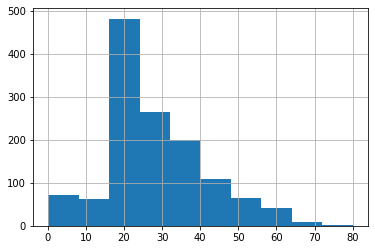

In [79]:
all_data['Age'].hist()

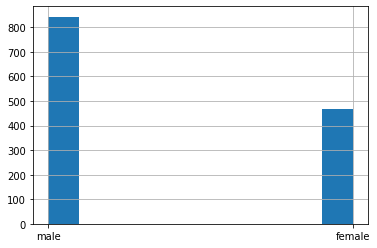

In [80]:
all_data['Sex'].hist()

Функция groupby группирует данные по указанному атрибуту с учетом некоторой функции.

Нужно понимать, что при этом индексы полученного датафрейма уже являются не просто номерами, а значениями атрибута, по которому осуществляется группировка

In [89]:
all_data.groupby('Sex').first()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Name_Prefix,Lastname,TicketPre,TicketNum_Groups,Relatives
Sex,,,,,,,,,,,
female,1,38.0,1,0,71.2833,c,mrs,cumings,pc,17599,1
male,3,22.0,1,0,7.2500,s,mr,braund,a5,21171,1


Можно получить конкрентую группу

In [90]:
all_data.groupby('Age').get_group(24)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Name_Prefix,Lastname,TicketPre,TicketNum_Groups,Relatives
5,3,male,24.0,0,0,8.4583,q,mr,moran,NoPre,330877,0
19,3,female,24.0,0,0,7.2250,c,mrs,masselmani,NoPre,2647,0
26,3,male,24.0,0,0,7.2250,c,mr,emir,NoPre,2631,0
28,3,female,24.0,0,0,7.8792,q,miss,o'dwyer,NoPre,330958,0
29,3,male,24.0,0,0,7.8958,s,mr,todoroff,NoPre,349201,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,3,female,24.0,0,0,7.7208,q,miss,riordan,NoPre,334914,0
1301,3,female,24.0,0,0,7.7500,q,miss,naughton,NoPre,365237,0
1304,3,male,24.0,0,0,8.0500,s,mr,spector,a5,3235,0
1307,3,male,24.0,0,0,8.0500,s,mr,ware,NoPre,359309,0


Посчитать количество значимых значений атрибутов у сущностей

In [85]:
all_data.groupby('Sex').count()

,Pclass,Age,SibSp,Parch,Fare,Embarked,Name_Prefix,Lastname,TicketPre,TicketNum_Groups,Relatives
Sex,,,,,,,,,,,
female,466,466,466,466,466,466,466,466,466,466,466
male,843,843,843,843,843,843,843,843,843,843,843


Найти медианное значение параметров согласно атрибуту и т.д.

In [86]:
all_data.groupby('Sex').median()

,Pclass,Age,SibSp,Parch,Fare,Relatives
Sex,,,,,,
female,2.0,24.0,0.0,0.0,23.0,1.0
male,3.0,26.0,0.0,0.0,11.5,0.0


Можно задавать список атрибутов, по которым осуществляется группировка

In [92]:
all_data.groupby(['Sex', 'Pclass']).median()

Age  SibSp  Parch      Fare  Relatives
Sex    Pclass                                         
female 1       37.5    0.0    0.0  80.92915        1.0
       2       28.0    0.0    0.0  23.00000        1.0
       3       24.0    0.0    0.0  10.48960        1.0
male   1       39.0    0.0    0.0  49.50420        0.0
       2       29.0    0.0    0.0  13.00000        0.0
       3       24.0    0.0    0.0   7.89580        0.0

get_dummies

Функция кодирует все виды признаков в булевые

In [73]:
all_df_copy = pd.get_dummies(all_data.drop(['Fare','Pclass','Age','Parch','SibSp','Lastname'],axis=1), drop_first=True)
all_df_copy

,Relatives,Sex_male,Embarked_q,Embarked_s,Name_Prefix_col,Name_Prefix_dr,Name_Prefix_jonkheer,Name_Prefix_lady,Name_Prefix_major,Name_Prefix_master,...,TicketNum_Groups_392096,TicketNum_Groups_394140,TicketNum_Groups_3101262,TicketNum_Groups_3101278,TicketNum_Groups_3101279,TicketNum_Groups_3101295,TicketNum_Groups_3101298,TicketNum_Groups_3101305,TicketNum_Groups_3101314,TicketNum_Groups_3101315
0,1,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1305,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1306,0,1,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1307,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
